In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from itertools import cycle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [4]:
matplotlib.rcParams['figure.dpi'] = 125

### Cause of loss
• For each county, retrieving relative percentages of top five causes of loss, from 1989-2018  
• Creating five columns to input as features into multiple regression

In [5]:
def get_top_causes(county, loss_county_year, loss_state_top):
    loss_county_year_dict = loss_county_year.to_dict()
    loss_county_year_dict_top = {}
    for key in loss_county_year_dict:
        year, cause = key[0], key[1]
        if cause in loss_state_top:
            loss_county_year_dict_top[key] = loss_county_year_dict[key]
            
    mapping = defaultdict(dict)
    for key in loss_county_year_dict_top:
        mapping[key[0]][key[1]] = loss_county_year_dict_top[key]
        
    for key in mapping: # key is a year
        value = mapping[key] # type dict
        for cause in loss_state_top:
            if cause not in value:
                value[cause] = 0
    
    df_mapping = pd.DataFrame(mapping).T
    df_mapping['County Name'] = county
    df_mapping = df_mapping.reset_index()
    df_mapping.rename(columns={'index':'Year'}, inplace=True)
    return df_mapping

#### Kansas

In [6]:
loss_Grant = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Grant_Cause_of_Loss.csv')
loss_Gray = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Gray_Cause_of_Loss.csv')
loss_Haskell = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Haskell_Cause_of_Loss.csv')
loss_Kearny = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Kearny_Cause_of_Loss.csv')
loss_Morton = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Morton_Cause_of_Loss.csv') 

In [7]:
loss_KS = pd.concat([loss_Grant, loss_Gray, loss_Haskell, loss_Kearny, loss_Morton])[['County name', 'Year', 'Cause of loss']]
loss_KS_overall = loss_KS['Cause of loss'].value_counts().head(3)
loss_KS_top = list(loss_KS_overall.to_dict().keys())
print(loss_KS_top)

['Drought', 'Freeze', 'Hail']


In [8]:
loss_Grant_year = loss_Grant['Cause of loss'].groupby(loss_Grant['Year']).value_counts(normalize=True)
loss_Gray_year = loss_Gray['Cause of loss'].groupby(loss_Gray['Year']).value_counts(normalize=True)
loss_Haskell_year = loss_Haskell['Cause of loss'].groupby(loss_Haskell['Year']).value_counts(normalize=True)
loss_Kearny_year = loss_Kearny['Cause of loss'].groupby(loss_Kearny['Year']).value_counts(normalize=True)
loss_Morton_year = loss_Morton['Cause of loss'].groupby(loss_Morton['Year']).value_counts(normalize=True)

causes_feat_Grant = get_top_causes('Grant', loss_Grant_year, loss_KS_top)
causes_feat_Gray = get_top_causes('Gray', loss_Gray_year, loss_KS_top)
causes_feat_Haskell = get_top_causes('Haskell', loss_Haskell_year, loss_KS_top)
causes_feat_Kearny = get_top_causes('Kearny', loss_Kearny_year, loss_KS_top)
causes_feat_Morton = get_top_causes('Morton', loss_Morton_year, loss_KS_top)

causes_feat_KS = pd.concat([causes_feat_Grant, causes_feat_Gray, causes_feat_Haskell, causes_feat_Kearny, causes_feat_Morton])

#### Washington

In [9]:
loss_Lincoln = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Lincoln_Cause_of_Loss.csv')
loss_Okanogan = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Okanogan_Cause_of_Loss.csv')
loss_Skagit = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Skagit_Cause_of_Loss.csv')
loss_Spokane = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Spokane_Cause_of_Loss.csv')
loss_Whitman = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Whitman_Cause_of_Loss.csv') 

In [10]:
loss_WA = pd.concat([loss_Lincoln, loss_Okanogan, loss_Skagit, loss_Spokane, loss_Whitman])[['County name', 'Year', 'Cause of loss']]
loss_WA_overall = loss_WA['Cause of loss'].value_counts().head(3)
loss_WA_top = list(loss_WA_overall.to_dict().keys())
print(loss_WA_top)

['Drought', 'Heat', 'Cold Winter']


In [11]:
loss_Lincoln_year = loss_Lincoln['Cause of loss'].groupby(loss_Lincoln['Year']).value_counts(normalize=True)
loss_Okanogan_year = loss_Okanogan['Cause of loss'].groupby(loss_Okanogan['Year']).value_counts(normalize=True)
loss_Skagit_year = loss_Skagit['Cause of loss'].groupby(loss_Skagit['Year']).value_counts(normalize=True)
loss_Spokane_year = loss_Spokane['Cause of loss'].groupby(loss_Spokane['Year']).value_counts(normalize=True)
loss_Whitman_year = loss_Whitman['Cause of loss'].groupby(loss_Whitman['Year']).value_counts(normalize=True)

causes_feat_Lincoln = get_top_causes('Lincoln', loss_Lincoln_year, loss_WA_top)
causes_feat_Okanogan = get_top_causes('Okanogan', loss_Okanogan_year, loss_WA_top)
causes_feat_Skagit = get_top_causes('Skagit', loss_Skagit_year, loss_WA_top)
causes_feat_Spokane = get_top_causes('Spokane', loss_Spokane_year, loss_WA_top)
causes_feat_Whitman = get_top_causes('Whitman', loss_Whitman_year, loss_WA_top)

causes_feat_WA = pd.concat([causes_feat_Lincoln, causes_feat_Okanogan, causes_feat_Skagit, causes_feat_Spokane, causes_feat_Whitman])

### Climate
• For each county, retrieving annual average mean temperature and precipitation, from 1989-2018  
• For each state (beyond region), retrieving average annual drought indices, from 1989-2018

In [12]:
def get_avg_temp(county, avg_temp_county):
    avg_temp_county = avg_temp_county.drop(['Anomaly'], axis=1)
    avg_temp_county.rename(columns={'Value':'Avg_Temp'}, inplace=True)
    avg_temp_county['Year'] = avg_temp_county['Date'].apply(lambda x: int(str(x)[:4]))
    avg_temp_county = avg_temp_county.drop(['Date'], axis=1)
    avg_temp_county['County Name'] = county
    avg_temp_county = avg_temp_county[avg_temp_county.Year <= 2018] # years from 1989-2018 (lower bound already 1989)
    return avg_temp_county

def get_precip(county, precip_county):
    precip_county = precip_county.drop(['Anomaly'], axis=1)
    precip_county.rename(columns={'Value':'Precipitation'}, inplace=True)
    precip_county['Year'] = precip_county['Date'].apply(lambda x: int(str(x)[:4]))
    precip_county = precip_county.drop(['Date'], axis=1)
    precip_county['County Name'] = county
    precip_county = precip_county[precip_county.Year <= 2018] # years from 1989-2018 (lower bound already 1989)
    return precip_county

def get_drought(state, drought_state):
    drought_state = drought_state.drop(['Anomaly'], axis=1)
    drought_state.rename(columns={'Value':'PDSI'}, inplace=True)
    drought_state['Year'] = drought_state['Date'].apply(lambda x: int(str(x)[:4]))
    drought_state = drought_state.drop(['Date'], axis=1)
    drought_state = pd.DataFrame(drought_state.groupby(['Year'], as_index=False)['PDSI'].mean()) # averaging monthly PDSIs
    drought_state['State Abbrv'] = state
    drought_state = drought_state[drought_state.Year <= 2018]
    return drought_state

#### Kansas

In [13]:
avg_temp_Grant = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Grant_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Gray = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Gray_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Haskell = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Haskell_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Kearny = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Kearny_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Morton = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Morton_Avg_Temp_Annual.csv', skiprows=4)

precip_Grant = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Grant_Precipitation_Annual.csv', skiprows=4)
precip_Gray = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Gray_Precipitation_Annual.csv', skiprows=4)
precip_Haskell = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Haskell_Precipitation_Annual.csv', skiprows=4)
precip_Kearny = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Kearny_Precipitation_Annual.csv', skiprows=4)
precip_Morton = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Morton_Precipitation_Annual.csv', skiprows=4)

drought_KS = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_PDSI.csv', skiprows=3)

In [14]:
avg_temp_feat_Grant = get_avg_temp('Grant', avg_temp_Grant)
avg_temp_feat_Gray = get_avg_temp('Gray', avg_temp_Gray)
avg_temp_feat_Haskell = get_avg_temp('Haskell', avg_temp_Haskell)
avg_temp_feat_Kearny = get_avg_temp('Kearny', avg_temp_Kearny)
avg_temp_feat_Morton = get_avg_temp('Morton', avg_temp_Morton)

precip_feat_Grant = get_precip('Grant', precip_Grant)
precip_feat_Gray = get_precip('Gray', precip_Gray)
precip_feat_Haskell = get_precip('Haskell', precip_Haskell)
precip_feat_Kearny = get_precip('Kearny', precip_Kearny)
precip_feat_Morton = get_precip('Morton', precip_Morton)

drought_feat_KS = get_drought('KS', drought_KS)

avg_temp_feat_KS = pd.concat([avg_temp_feat_Grant, avg_temp_feat_Gray, avg_temp_feat_Haskell, avg_temp_feat_Kearny, avg_temp_feat_Morton])
precip_feat_KS = pd.concat([precip_feat_Grant, precip_feat_Gray, precip_feat_Haskell, precip_feat_Kearny, precip_feat_Morton])

#### Washington

In [15]:
avg_temp_Lincoln = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Lincoln_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Okanogan = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Okanogan_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Skagit = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Skagit_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Spokane = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Spokane_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Whitman = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Whitman_Avg_Temp_Annual.csv', skiprows=4)

precip_Lincoln = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Lincoln_Precipitation_Annual.csv', skiprows=4)
precip_Okanogan = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Okanogan_Precipitation_Annual.csv', skiprows=4)
precip_Skagit = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Skagit_Precipitation_Annual.csv', skiprows=4)
precip_Spokane = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Spokane_Precipitation_Annual.csv', skiprows=4)
precip_Whitman = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Whitman_Precipitation_Annual.csv', skiprows=4)

drought_WA = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_PDSI.csv', skiprows=3)

In [16]:
avg_temp_feat_Lincoln = get_avg_temp('Lincoln', avg_temp_Lincoln)
avg_temp_feat_Okanogan = get_avg_temp('Okanogan', avg_temp_Okanogan)
avg_temp_feat_Skagit = get_avg_temp('Skagit', avg_temp_Skagit)
avg_temp_feat_Spokane = get_avg_temp('Spokane', avg_temp_Spokane)
avg_temp_feat_Whitman = get_avg_temp('Whitman', avg_temp_Whitman)

precip_feat_Lincoln = get_precip('Lincoln', precip_Lincoln)
precip_feat_Okanogan = get_precip('Okanogan', precip_Okanogan)
precip_feat_Skagit = get_precip('Skagit', precip_Skagit)
precip_feat_Spokane = get_precip('Spokane', precip_Spokane)
precip_feat_Whitman = get_precip('Whitman', precip_Whitman)

drought_feat_WA = get_drought('WA', drought_WA)

avg_temp_feat_WA = pd.concat([avg_temp_feat_Lincoln, avg_temp_feat_Okanogan, avg_temp_feat_Skagit, avg_temp_feat_Spokane, avg_temp_feat_Whitman])
precip_feat_WA = pd.concat([precip_feat_Lincoln, precip_feat_Okanogan, precip_feat_Skagit, precip_feat_Spokane, precip_feat_Whitman])

### Report Generator
• For each county, selecting feature and target columns, from 1989-2018  
• Merging cause of loss and climate data features by county name into report generator dataset

#### Kansas

In [17]:
insurance_KS = pd.read_excel('Data_KS_WA/KS/KS_Report_Generator.xlsx')
insurance_KS = insurance_KS[insurance_KS['Commodity Year'] <= 2018]
insurance_KS = insurance_KS[insurance_KS['Commodity Name'] != 'All Other Commodities']
insurance_KS = insurance_KS.rename(columns={'Commodity Year': 'Year'})
#print(insurance_KS.columns)

In [18]:
insurance_features_KS = insurance_KS[['Year', 'State Abbrv', 'County Name', 'Policies Sold', 
                                      'Policies Earning Prem', 'Policies Indemnified', 
                                      'Units Earning Prem', 'Units Indemnified', 'Quantity', 'Subsidy ($)']]

insurance_targets_KS = insurance_KS[['Year', 'County Name', 'Liabilities ($)', 'Total Prem ($)', 'Indemnity ($)', 'Earn Prem Rate', 'Loss Ratio']]

print('features:', insurance_features_KS.shape)
print('targets:', insurance_targets_KS.shape)

features: (147, 10)
targets: (147, 7)


In [19]:
temp_insurance_KS = insurance_features_KS.merge(avg_temp_feat_KS, how='inner', on=['Year', 'County Name'])
precip_temp_insurance_KS = temp_insurance_KS.merge(precip_feat_KS, how='inner', on=['Year', 'County Name'])

In [20]:
counties_KS = cycle(['Grant','Gray','Haskell', 'Kearny', 'Morton'])
augmented_drought_feat_KS = pd.concat([drought_feat_KS]*5, ignore_index=True).sort_values(by=['Year'])
augmented_drought_feat_KS['County Name'] = [next(counties_KS) for county in range(len(augmented_drought_feat_KS))]

drought_precip_insurance_KS = precip_temp_insurance_KS.merge(augmented_drought_feat_KS, how='inner', on=['Year', 'County Name', 'State Abbrv'])

In [21]:
causes_drought_precip_insurance_KS = drought_precip_insurance_KS.merge(causes_feat_KS, how='outer', on=['Year', 'County Name'])
causes_drought_precip_insurance_KS = causes_drought_precip_insurance_KS.fillna(0) # assuming no losses if not reported

In [22]:
features_KS = causes_drought_precip_insurance_KS.drop('State Abbrv', axis=1)
features_KS['County Name'] = features_KS['County Name'].map({'Grant': 1, 'Gray': 2, 'Haskell': 3, 'Kearny': 4, 'Morton': 5})
features_KS.rename(columns={'County Name':'County', 'Policies Earning Prem': 'Policies Earning Premium',
                           'Units Earning Prem': 'Units Earning Premium', 'Subsidy ($)': 'Subsidy', 
                           'Avg_Temp': 'Average Temperature', 'Freeze': 'Loss: Freeze',
                           'Drought': 'Loss: Drought', 'Hail': 'Loss: Hail'}, inplace=True)
print(features_KS.shape)
features_KS.head()

(147, 15)


,Year,County,Policies Sold,Policies Earning Premium,Policies Indemnified,Units Earning Premium,Units Indemnified,Quantity,Subsidy,Average Temperature,Precipitation,PDSI,Loss: Drought,Loss: Freeze,Loss: Hail
0,1989,1,49,47,28,145,71,10051,21381,53.4,23.95,-1.2675,0.437500,0.187500,0.000000
1,1989,2,129,126,76,251,124,20935,37941,53.1,22.64,-1.2675,0.375000,0.125000,0.083333
2,1989,3,75,71,34,181,73,13570,23696,53.3,24.34,-1.2675,0.375000,0.187500,0.062500
3,1989,4,63,57,28,182,42,15541,34732,52.7,21.70,-1.2675,0.500000,0.166667,0.000000
4,1989,5,74,72,57,280,197,20192,40781,54.0,21.13,-1.2675,0.321429,0.178571,0.107143


In [23]:
targets_KS = insurance_targets_KS.rename(columns={'County Name': 'County', 'Liabilities ($)': 'Liabilities', 
                                                  'Total Prem ($)': 'Total Premium', 'Indemnity ($)': 'Indemnity', 
                                                  'Earn Prem Rate': 'Earn Premium Rate'})
targets_KS = targets_KS.drop(['Year', 'County'], axis=1)
print(targets_KS.shape)
targets_KS.head()

(147, 5)


,Liabilities,Total Premium,Indemnity,Earn Premium Rate,Loss Ratio
0,685702,71500,158457,0.104272,2.216181
1,1229482,127161,365098,0.103426,2.871147
2,969071,80135,131035,0.082692,1.635178
3,921050,116608,87687,0.126603,0.751980
4,1193355,138764,441029,0.116280,3.178266


In [24]:
features_targets_KS = pd.concat([features_KS.reset_index(drop=True), targets_KS.reset_index(drop=True)], axis=1)
#print(features_targets_KS.shape)
#features_targets_KS.head()

#### Washington

In [25]:
insurance_WA = pd.read_excel('Data_KS_WA/WA/WA_Report_Generator.xlsx')
insurance_WA = insurance_WA[insurance_WA['Commodity Year'] <= 2018]
insurance_WA = insurance_WA[insurance_WA['Commodity Name'] != 'All Other Commodities']
insurance_WA = insurance_WA.rename(columns={'Commodity Year': 'Year'})
#print(insurance_WA.columns)

In [26]:
insurance_features_WA = insurance_WA[['Year', 'State Abbrv', 'County Name', 'Policies Sold', 
                                      'Policies Earning Prem', 'Policies Indemnified', 
                                      'Units Earning Prem', 'Units Indemnified', 'Quantity', 'Subsidy ($)']]

insurance_targets_WA = insurance_WA[['Year', 'County Name', 'Liabilities ($)', 'Total Prem ($)', 'Indemnity ($)', 'Earn Prem Rate', 'Loss Ratio']]

print('features:', insurance_features_WA.shape)
print('targets:', insurance_targets_WA.shape)

features: (134, 10)
targets: (134, 7)


In [27]:
temp_insurance_WA = insurance_features_WA.merge(avg_temp_feat_WA, how='inner', on=['Year', 'County Name'])
precip_temp_insurance_WA = temp_insurance_WA.merge(precip_feat_WA, how='inner', on=['Year', 'County Name'])

In [28]:
counties_WA = cycle(['Lincoln','Okanogan','Skagit', 'Spokane', 'Whitman'])
augmented_drought_feat_WA = pd.concat([drought_feat_WA]*5, ignore_index=True).sort_values(by=['Year'])
augmented_drought_feat_WA['County Name'] = [next(counties_WA) for county in range(len(augmented_drought_feat_WA))]

drought_precip_insurance_WA = precip_temp_insurance_WA.merge(augmented_drought_feat_WA, how='inner', on=['Year', 'County Name', 'State Abbrv'])

In [29]:
causes_drought_precip_insurance_WA = drought_precip_insurance_WA.merge(causes_feat_WA, how='outer', on=['Year', 'County Name'])
causes_drought_precip_insurance_WA = causes_drought_precip_insurance_WA.fillna(0) # assuming no losses if not reported

In [30]:
features_WA = causes_drought_precip_insurance_WA.drop('State Abbrv', axis=1)
features_WA['County Name'] = features_WA['County Name'].map({'Lincoln': 1, 'Okanogan': 2, 'Skagit': 3, 'Spokane': 4, 'Whitman': 5})
features_WA.rename(columns={'County Name':'County', 'Policies Earning Prem': 'Policies Earning Premium',
                           'Units Earning Prem': 'Units Earning Premium', 'Subsidy ($)': 'Subsidy', 
                           'Avg_Temp': 'Average Temperature', 'Cold Winter': 'Loss: Cold Winter',
                           'Drought': 'Loss: Drought', 'Heat': 'Loss: Heat'}, inplace=True)
print(features_WA.shape)
features_WA.head()

(134, 15)


,Year,County,Policies Sold,Policies Earning Premium,Policies Indemnified,Units Earning Premium,Units Indemnified,Quantity,Subsidy,Average Temperature,Precipitation,PDSI,Loss: Cold Winter,Loss: Drought,Loss: Heat
0,1989,1,747,747,431,1481,695,200126,150821,46.2,11.57,-1.426667,0.206897,0.344828,0.034483
1,1989,4,132,132,31,235,39,19065,19320,46.0,19.43,-1.426667,0.230769,0.461538,0.000000
2,1989,5,1215,1215,353,2062,470,280461,193273,48.2,16.95,-1.426667,0.206897,0.275862,0.068966
3,1990,1,725,701,87,1452,111,186152,164373,47.8,12.89,1.212500,0.000000,0.500000,0.312500
4,1990,5,908,880,16,1513,16,222992,172482,49.4,17.43,1.212500,0.000000,0.500000,0.400000


In [31]:
targets_WA = insurance_targets_WA.rename(columns={'County Name': 'County', 'Liabilities ($)': 'Liabilities', 
                                                  'Total Prem ($)': 'Total Premium', 'Indemnity ($)': 'Indemnity', 
                                                  'Earn Prem Rate': 'Earn Premium Rate'})
targets_WA = targets_WA.drop(['Year', 'County'], axis=1)
print(targets_WA.shape)
targets_WA.head()

(134, 5)


,Liabilities,Total Premium,Indemnity,Earn Premium Rate,Loss Ratio
2,22702070,870493,1709526,0.038344,1.963859
3,2503169,106985,76808,0.042739,0.717932
4,40049559,1117467,1378891,0.027902,1.233943
8,23933491,936365,331388,0.039123,0.353908
9,35668352,1022673,91004,0.028671,0.088986


In [32]:
features_targets_WA = pd.concat([features_WA.reset_index(drop=True), targets_WA.reset_index(drop=True)], axis=1)
#print(features_targets_WA.shape)
#features_targets_WA.head()

### Linear Regressions

#### Kansas

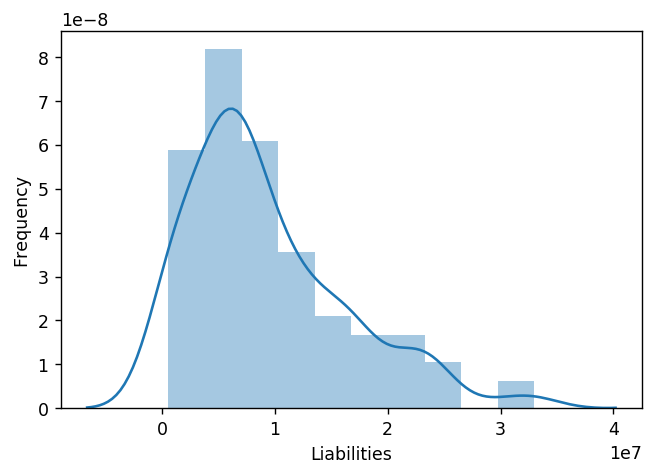

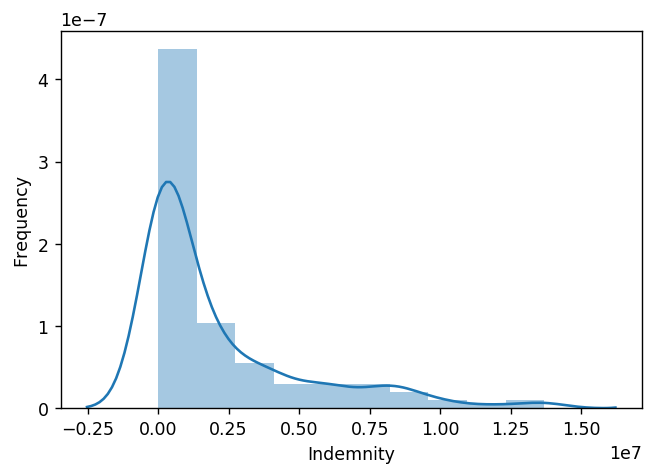

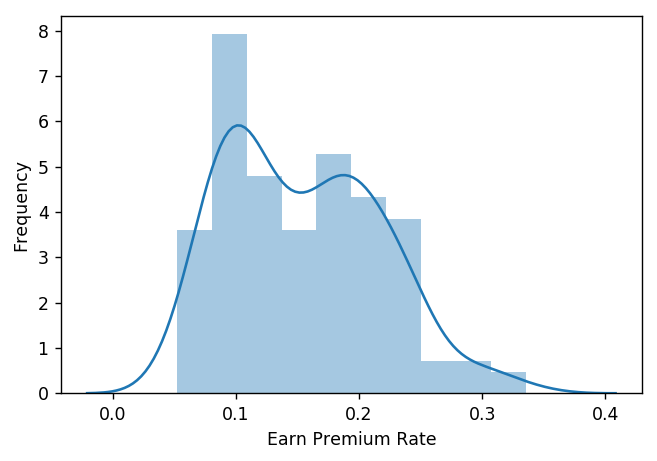

In [33]:
sns.distplot(targets_KS['Liabilities'], bins=10)
plt.ylabel('Frequency')
plt.show()
sns.distplot(targets_KS['Indemnity'], bins=10)
plt.ylabel('Frequency')
plt.show()
sns.distplot(targets_KS['Earn Premium Rate'], bins=10)
plt.ylabel('Frequency')
plt.show()

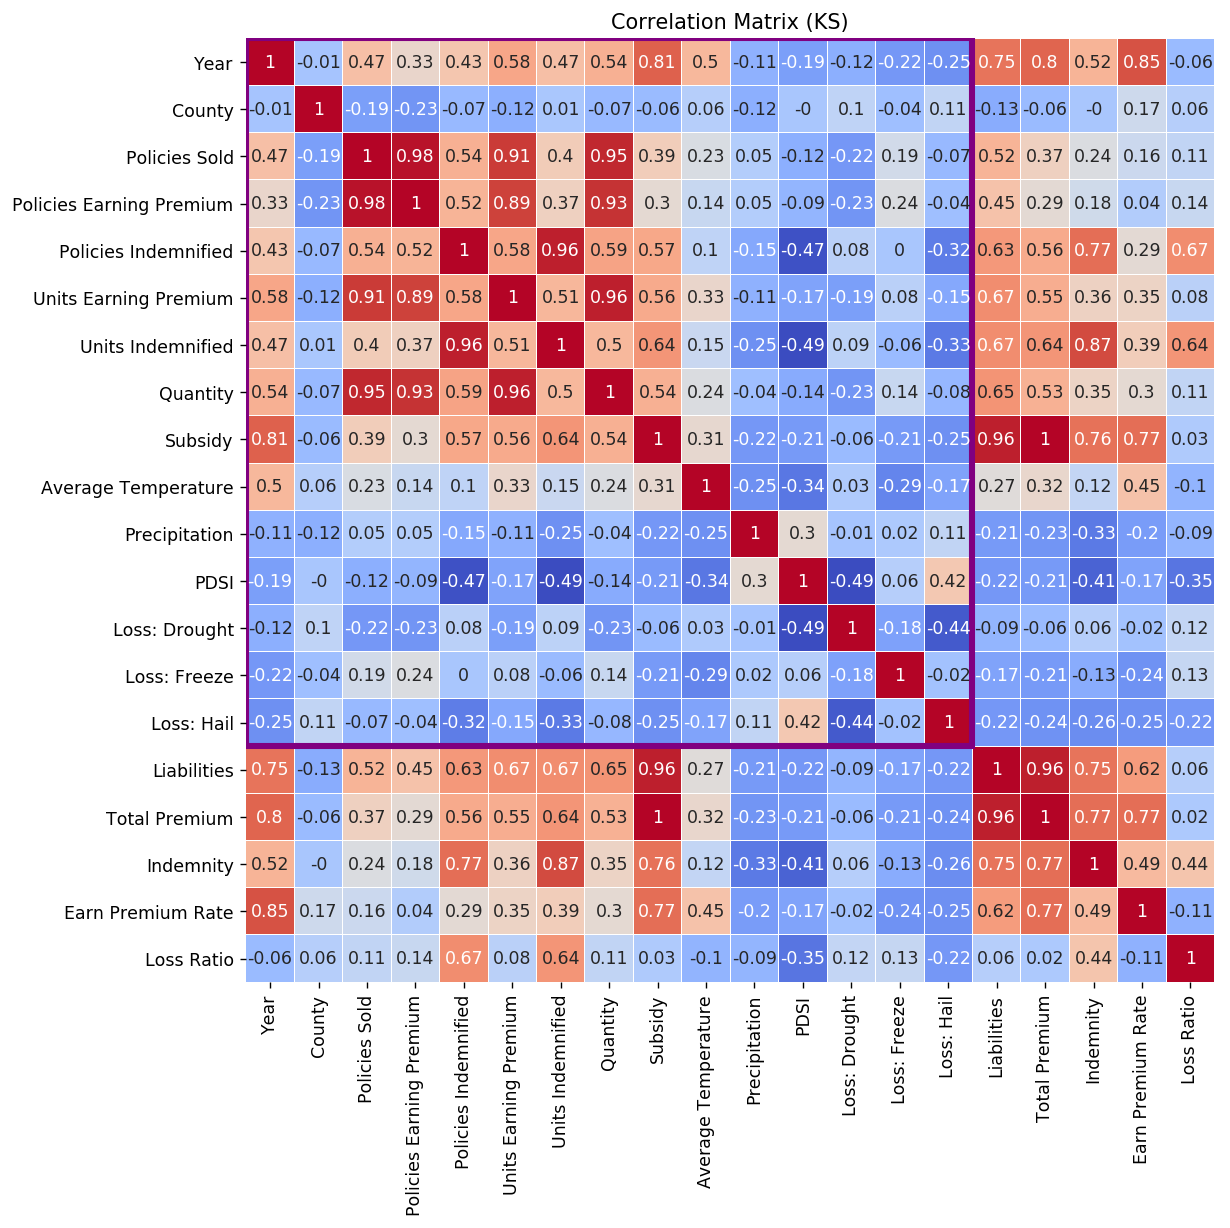

In [34]:
plt.figure(figsize=(10,10))
correlation_matrix_KS = features_targets_KS.corr().round(2)
g = sns.heatmap(data=correlation_matrix_KS, cmap='coolwarm', cbar=False, linewidth=0.01, annot=True)
g.add_patch(Rectangle((0, 15), 15, -15, fill=False, edgecolor='purple', lw=3.5))
plt.title("Correlation Matrix (KS)")
plt.show()

Pruned correlation matrix for KS  
• Taking out features suffering from multicollinearity  
• Ensuring that features correlate well with time  
• Including raw targets — indemnity, earn premium rate, liabilities  

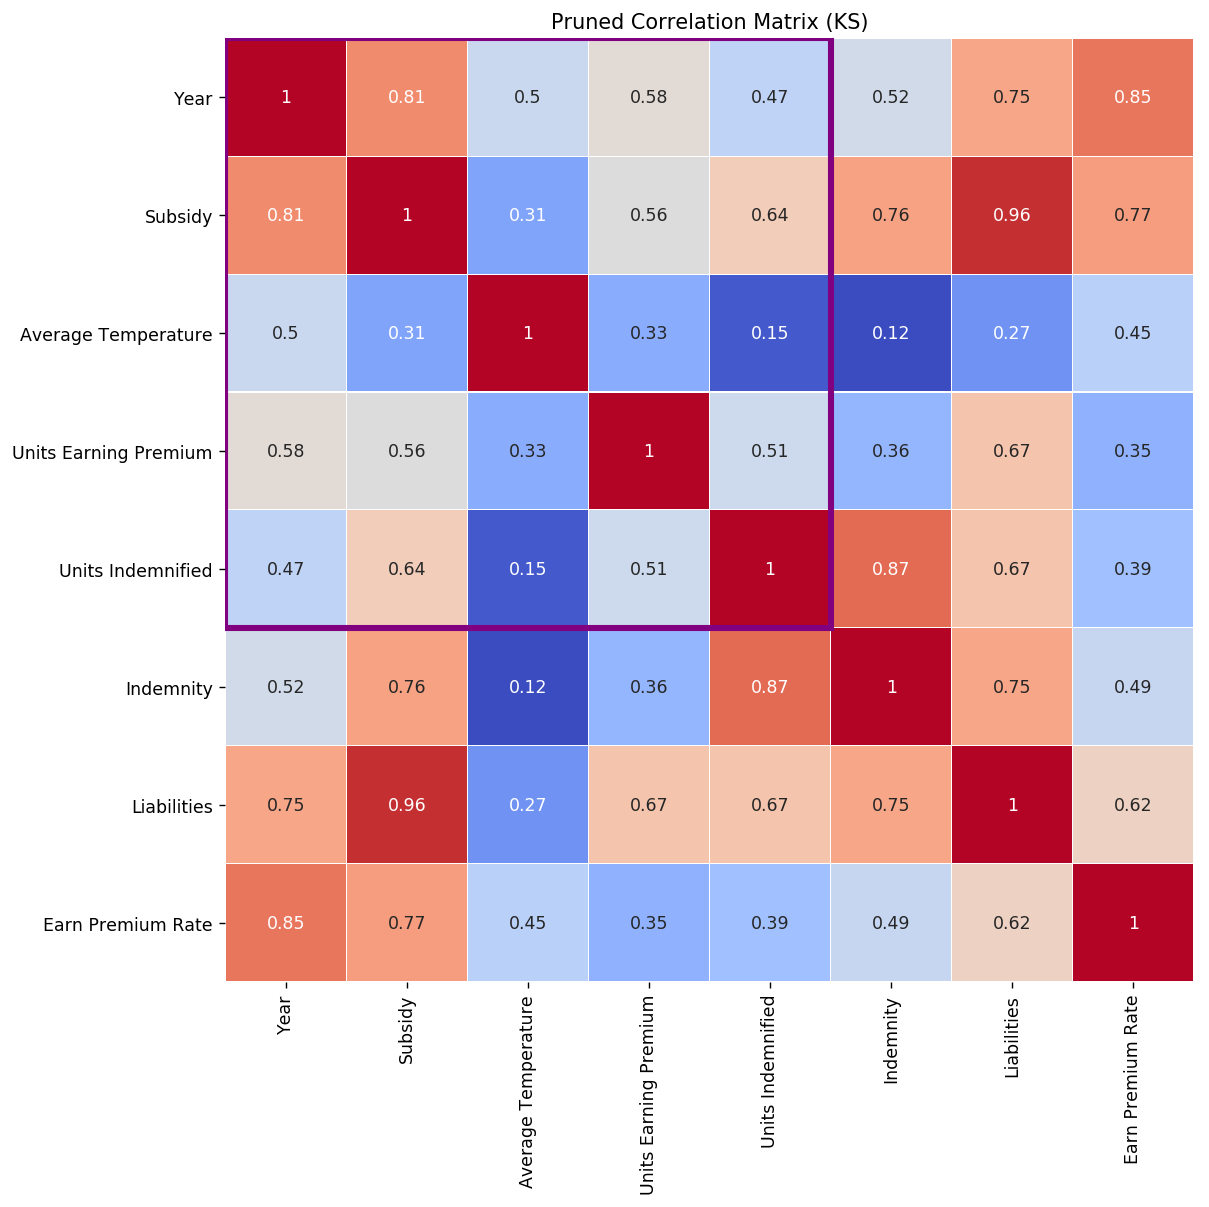

In [35]:
pruned_features_targets_KS = features_targets_KS[['Year', 'Subsidy', 'Average Temperature', 
                                                 'Units Earning Premium', 'Units Indemnified', 
                                                 'Indemnity', 'Liabilities', 'Earn Premium Rate']]

plt.figure(figsize=(10,10))
pruned_correlation_matrix_KS = pruned_features_targets_KS.corr().round(2)
g = sns.heatmap(data=pruned_correlation_matrix_KS, cmap='coolwarm', cbar=False, linewidth=0.01, annot=True)
g.add_patch(Rectangle((0, 5), 5, -5, fill=False, edgecolor='purple', lw=3.5))
plt.title("Pruned Correlation Matrix (KS)")
plt.show()

Running linear regressions (KS)  
• Separate models for each of indemnity, liabilities, earn premium rate  
• 80%-20% train-test split  

In [36]:
def run_multiple_regression_KS(target):
    X = pruned_features_targets_KS[['Year', 'Subsidy', 'Average Temperature', 
                                'Units Earning Premium', 'Units Indemnified']]
    Y = pruned_features_targets_KS[[target]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    #print(X_train.shape)
    #print(X_test.shape)
    #print(Y_train.shape)
    #print(Y_test.shape)
    
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    
    cdf = pd.DataFrame(lin_model.coef_.T, X.columns, columns=['coefficients'])
    print(cdf)
    #print('coefficients:', lin_model.coef_)
    print('intercept:', lin_model.intercept_)
    print("--------------------------------------")

    print(target + ": model performance for training set (KS)")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    print("--------------------------------------")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print(target + ": model performance for testing set (KS)")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [37]:
run_multiple_regression_KS('Liabilities')

                        coefficients
Year                  -115731.913844
Subsidy                     7.219860
Average Temperature   -165806.943207
Units Earning Premium    2935.207838
Units Indemnified         304.077978
intercept: [2.39515949e+08]
--------------------------------------
Liabilities: model performance for training set (KS)
RMSE is 1431876.4139802488
R2 score is 0.9593129051113578
--------------------------------------
Liabilities: model performance for testing set (KS)
RMSE is 1294774.487731763
R2 score is 0.9657555947591115


In [38]:
run_multiple_regression_KS('Earn Premium Rate')

                       coefficients
Year                   4.953858e-03
Subsidy                2.543798e-08
Average Temperature    4.098243e-03
Units Earning Premium -2.866068e-05
Units Indemnified     -1.001129e-05
intercept: [-9.98321016]
--------------------------------------
Earn Premium Rate: model performance for training set (KS)
RMSE is 0.02762202635274572
R2 score is 0.8062809465967394
--------------------------------------
Earn Premium Rate: model performance for testing set (KS)
RMSE is 0.029785452639716513
R2 score is 0.7416669593138222


In [39]:
run_multiple_regression_KS('Indemnity')

                        coefficients
Year                   -13778.129777
Subsidy                     1.560787
Average Temperature   -102203.699217
Units Earning Premium   -1347.250223
Units Indemnified        4693.469780
intercept: [33304808.89752666]
--------------------------------------
Indemnity: model performance for training set (KS)
RMSE is 1062929.6502806505
R2 score is 0.8691782761685044
--------------------------------------
Indemnity: model performance for testing set (KS)
RMSE is 1094792.6489520676
R2 score is 0.8865558981842682


#### Washington

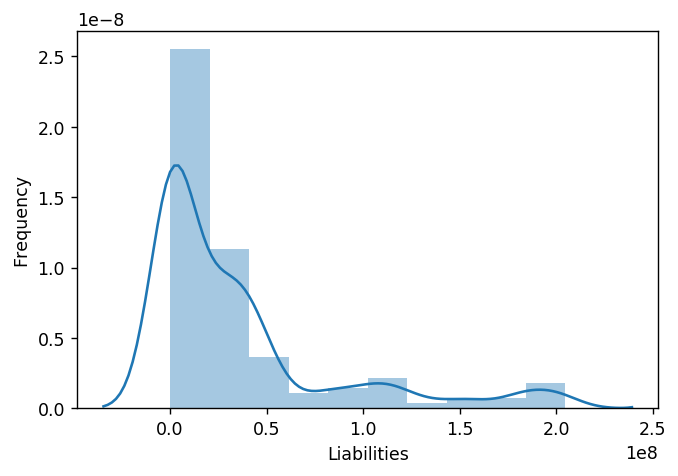

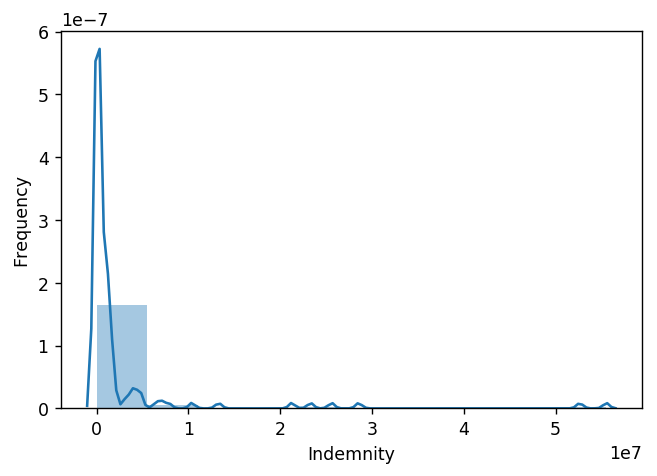

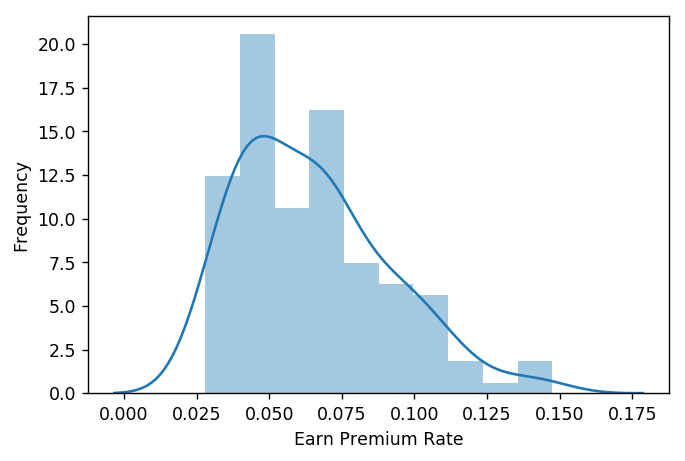

In [40]:
sns.distplot(targets_WA['Liabilities'], bins=10)
plt.ylabel('Frequency')
plt.show()
sns.distplot(targets_WA['Indemnity'], bins=10)
plt.ylabel('Frequency')
plt.show()
sns.distplot(targets_WA['Earn Premium Rate'], bins=10)
plt.ylabel('Frequency')
plt.show()

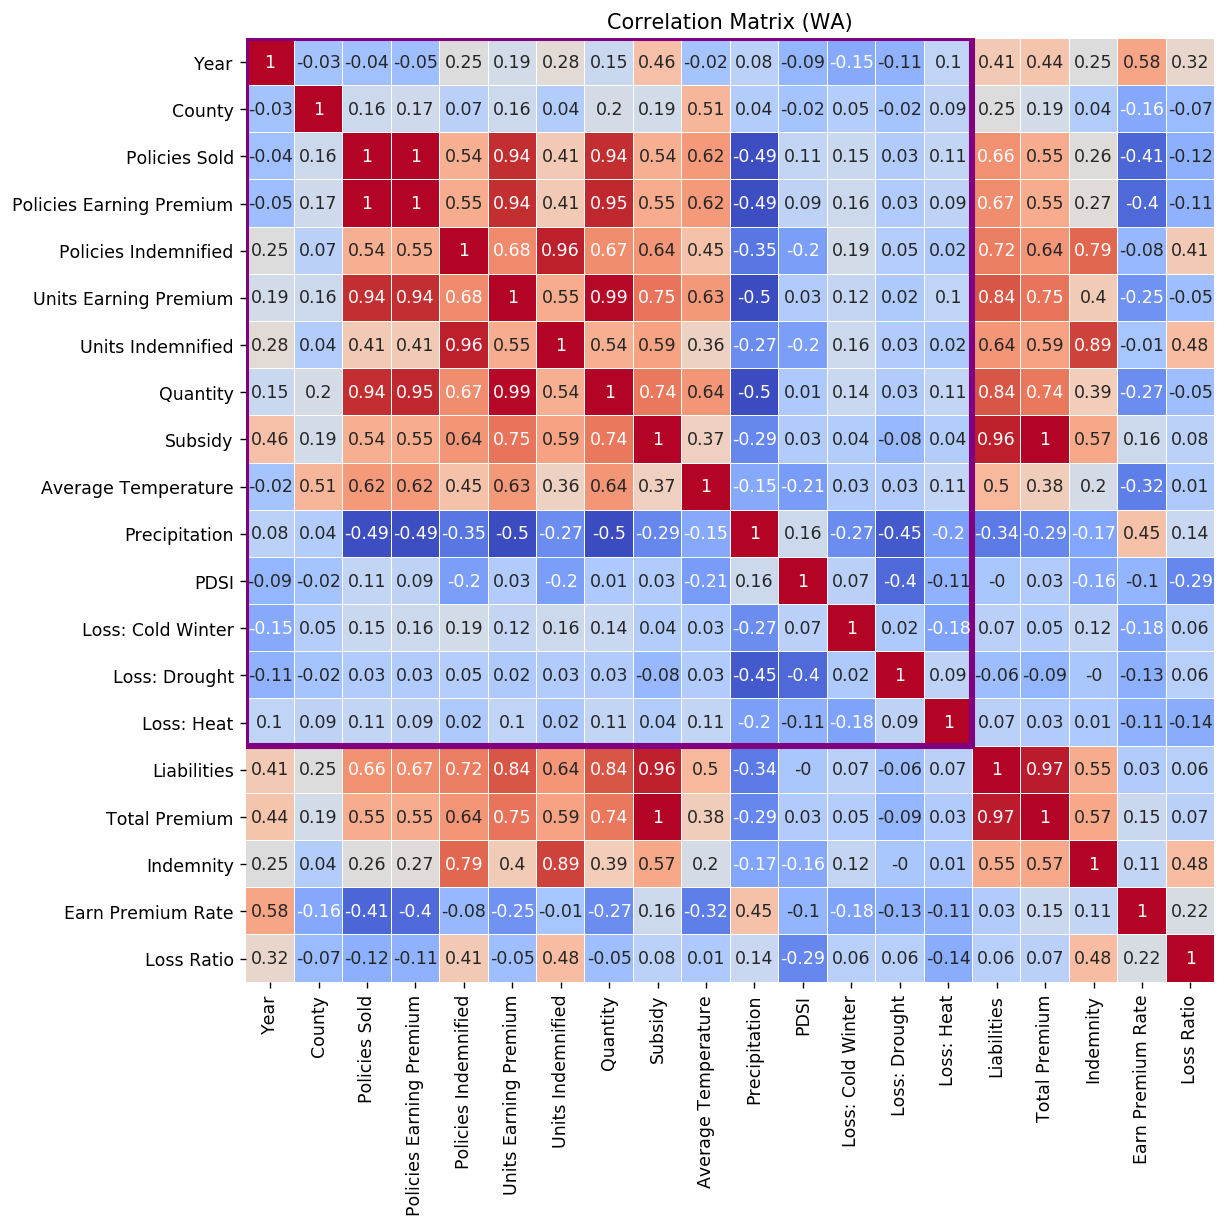

In [41]:
plt.figure(figsize=(10,10))
correlation_matrix_WA = features_targets_WA.corr().round(2)
g = sns.heatmap(data=correlation_matrix_WA, cmap='coolwarm', cbar=False, linewidth=0.01, annot=True)
g.add_patch(Rectangle((0, 15), 15, -15, fill=False, edgecolor='purple', lw=3.5))
plt.title("Correlation Matrix (WA)")
plt.show()

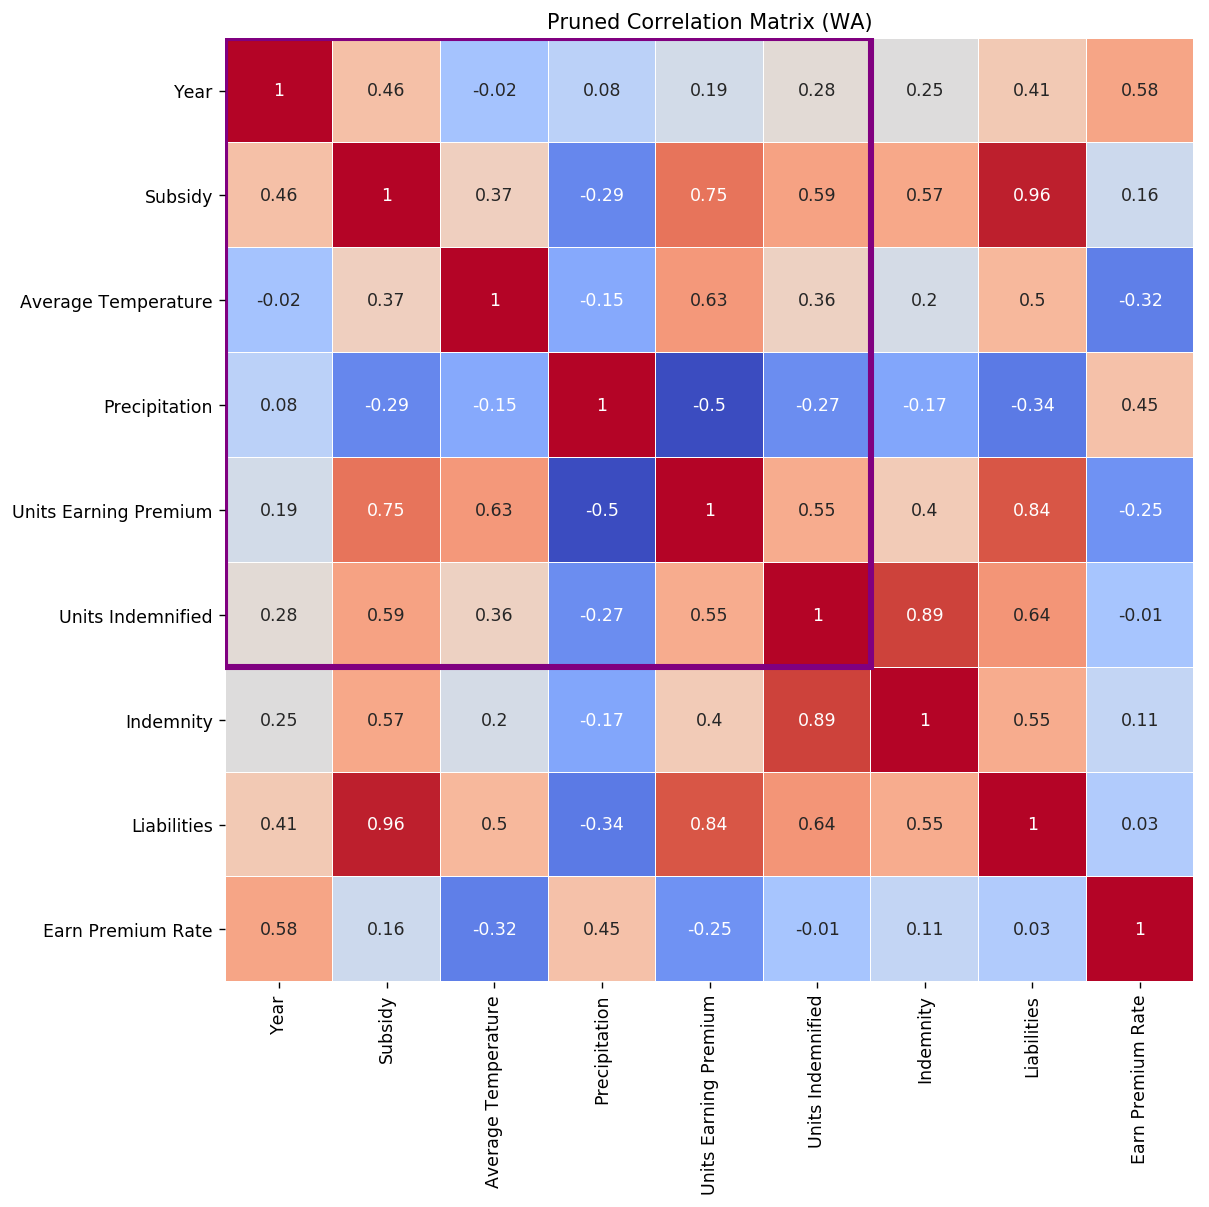

In [42]:
pruned_features_targets_WA = features_targets_WA[['Year', 'Subsidy', 'Average Temperature', 'Precipitation',  
                                                 'Units Earning Premium', 'Units Indemnified', 
                                                 'Indemnity', 'Liabilities', 'Earn Premium Rate']]

plt.figure(figsize=(10,10))
pruned_correlation_matrix_WA = pruned_features_targets_WA.corr().round(2)
g = sns.heatmap(data=pruned_correlation_matrix_WA, cmap='coolwarm', cbar=False, linewidth=0.01, annot=True)
g.add_patch(Rectangle((0, 6), 6, -6, fill=False, edgecolor='purple', lw=3.5))
plt.title("Pruned Correlation Matrix (WA)")
plt.show()

Running linear regressions (WA)  
• Separate models for each of indemnity, liabilities, earn premium rate  
• 80%-20% train-test split  

In [43]:
def run_multiple_regression_WA(target):
    X = pruned_features_targets_WA[['Year', 'Subsidy', 'Average Temperature', 'Precipitation', 
                                'Units Earning Premium', 'Units Indemnified']]
    Y = pruned_features_targets_WA[[target]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    #print(X_train.shape)
    #print(X_test.shape)
    #print(Y_train.shape)
    #print(Y_test.shape)
    
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    
    cdf = pd.DataFrame(lin_model.coef_.T, X.columns, columns=['coefficients'])
    print(cdf)
    #print('coefficients:', lin_model.coef_)
    print('intercept:', lin_model.intercept_)
    print("--------------------------------------")
    
    print(target + ": model performance for training set (WA)")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    print("--------------------------------------")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print(target + ": model performance for testing set (WA)")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [44]:
run_multiple_regression_WA('Liabilities')

                       coefficients
Year                   1.693143e+05
Subsidy                2.191762e+01
Average Temperature    1.420706e+06
Precipitation          8.484952e+03
Units Earning Premium  9.833394e+03
Units Indemnified      4.768444e+03
intercept: [-4.06022666e+08]
--------------------------------------
Liabilities: model performance for training set (WA)
RMSE is 9574016.871224865
R2 score is 0.9685778946045003
--------------------------------------
Liabilities: model performance for testing set (WA)
RMSE is 8399723.68988938
R2 score is 0.9361863940339392


In [45]:
run_multiple_regression_WA('Earn Premium Rate')

                       coefficients
Year                   1.361978e-03
Subsidy                6.006930e-09
Average Temperature   -2.140914e-03
Precipitation          3.434671e-04
Units Earning Premium -6.442590e-06
Units Indemnified     -3.770372e-07
intercept: [-2.57304537]
--------------------------------------
Earn Premium Rate: model performance for training set (WA)
RMSE is 0.016082160859529987
R2 score is 0.5968634594757279
--------------------------------------
Earn Premium Rate: model performance for testing set (WA)
RMSE is 0.017004555899553707
R2 score is 0.6493503317977568


In [46]:
run_multiple_regression_WA('Indemnity')

                        coefficients
Year                  -124953.411793
Subsidy                     1.792049
Average Temperature   -362637.334351
Precipitation           11604.474211
Units Earning Premium   -1700.939952
Units Indemnified       12829.780498
intercept: [2.66446201e+08]
--------------------------------------
Indemnity: model performance for training set (WA)
RMSE is 3266901.4660111717
R2 score is 0.8560168884776457
--------------------------------------
Indemnity: model performance for testing set (WA)
RMSE is 2103833.2209173506
R2 score is -0.04944976141069568


### Projecting Trends
• Calculating values of features (regressions with time) up until 2050  
• Plotting trend up until 2018  
• Overlaying plot with model trend up until 2050, after evaluation with new inputs  

In [71]:
def get_projected(val, coeffs_dict):
    m, b = coeffs_dict['m'], coeffs_dict['b']
    new_val = m*val + b
    return new_val

# Kansas
def get_lin_mod_feat_KS(feat): # over time
    x, y = pruned_features_targets_KS['Year'].to_numpy(), pruned_features_targets_KS[feat].to_numpy()
    X, Y = x.reshape(-1,1), y.reshape(-1,1)
    reg = LinearRegression().fit(X, Y)
    return {'R2': reg.score(X, Y), 'm': reg.coef_[0][0], 'b': reg.intercept_[0]}

def get_lin_model_KS(target):
    X = pruned_features_targets_KS[['Year', 'Subsidy', 'Average Temperature', 
                                'Units Earning Premium', 'Units Indemnified']]
    Y = pruned_features_targets_KS[[target]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    return lin_model

def plot_predicted_trend_KS(target, lin_model, projected):
    X = pruned_features_targets_KS[['Year', 'Subsidy', 'Average Temperature', 
                                'Units Earning Premium', 'Units Indemnified']]
    Y = pruned_features_targets_KS[[target]] # raw Y
    X_time = X['Year']
    Y_predicted = lin_model.predict(X)
    plt.plot(X_time, Y, linewidth=1.25, color='black', marker='o', markersize=3)
    plt.plot(X_time, Y_predicted, linewidth=1, linestyle='-', color='deepskyblue')
    
    # ADDED!!!!
    Y_projected = lin_model.predict(projected)
    print(Y_projected)
    plt.plot(projected['Year'], Y_projected, linewidth=1, linestyle='--', color='deepskyblue', marker='o')
    
    plt.xlabel('Year')
    plt.ylabel(target)
    plt.title('Predicted {} (KS)'.format(target))
    plt.grid(linestyle='-', linewidth=0.25)
    plt.show()

# Washington
def get_lin_mod_feat_WA(feat): # over time
    x, y = pruned_features_targets_WA['Year'].to_numpy(), pruned_features_targets_WA[feat].to_numpy()
    X, Y = x.reshape(-1,1), y.reshape(-1,1)
    reg = LinearRegression().fit(X, Y)
    return {'R2': reg.score(X, Y), 'm': reg.coef_[0][0], 'b': reg.intercept_[0]}

def get_lin_model_WA(target): 
    X = pruned_features_targets_WA[['Year', 'Subsidy', 'Average Temperature', 'Precipitation', 
                                'Units Earning Premium', 'Units Indemnified']]
    Y = pruned_features_targets_KS[[target]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    return lin_model

def plot_predicted_trend_WA(target, lin_model):
    X = pruned_features_targets_WA[['Year', 'Subsidy', 'Average Temperature', 'Precipitation', 
                                'Units Earning Premium', 'Units Indemnified']]
    Y = pruned_features_targets_WA[[target]] # raw Y
    X_time = X['Year']
    Y_predicted = lin_model.predict(X)
    plt.plot(X_time, Y, linewidth=1.25, color='black', marker='o', markersize=3)
    plt.plot(X_time, Y_predicted, linewidth=1, linestyle='-', color='forestgreen')
    plt.xlabel('Year')
    plt.ylabel(target)
    plt.title('Predicted {} (WA)'.format(target))
    plt.grid(linestyle='-', linewidth=0.25)
    plt.show()

#### Kansas

In [72]:
print('Subsidy:', get_lin_mod_feat_KS('Subsidy'))
print('Average Temperature:', get_lin_mod_feat_KS('Average Temperature'))
print('Units Earning Premium:', get_lin_mod_feat_KS('Units Earning Premium'))
print('Units Indemnified:', get_lin_mod_feat_KS('Units Indemnified'))

Subsidy: {'R2': 0.6494513152594098, 'm': 88873.04483088097, 'b': -177098031.5044908}
Average Temperature: {'R2': 0.2511057054680279, 'm': 0.07484578635581889, 'b': -94.74014013631451}
Units Earning Premium: {'R2': 0.33592822521435206, 'm': 34.99261609019684, 'b': -68886.10906427164}
Units Indemnified: {'R2': 0.22046031572838917, 'm': 24.338532390598132, 'b': -48302.17964838526}


In [73]:
projected_features_targets_KS = pd.DataFrame({'Year': np.arange(2018, 2051)})
projected_features_targets_KS['Subsidy'] = projected_features_targets_KS['Year'].map(lambda val: get_projected(val, get_lin_mod_feat_KS('Subsidy')))
projected_features_targets_KS['Average Temperature'] = projected_features_targets_KS['Year'].map(lambda val: get_projected(val, get_lin_mod_feat_KS('Average Temperature')))
projected_features_targets_KS['Units Earning Premium'] = projected_features_targets_KS['Year'].map(lambda val: get_projected(val, get_lin_mod_feat_KS('Units Earning Premium')))
projected_features_targets_KS['Units Indemnified'] = projected_features_targets_KS['Year'].map(lambda val: get_projected(val, get_lin_mod_feat_KS('Units Indemnified')))

projected_features_targets_KS.head()

,Year,Subsidy,Average Temperature,Units Earning Premium,Units Indemnified
0,2018,2.247773e+06,56.298657,1728.990206,812.978716
1,2019,2.336646e+06,56.373503,1763.982822,837.317248
2,2020,2.425519e+06,56.448348,1798.975438,861.655781
3,2021,2.514392e+06,56.523194,1833.968054,885.994313
4,2022,2.603265e+06,56.598040,1868.960670,910.332845


In [74]:
pruned_features_targets_KS.tail(10)

,Year,Subsidy,Average Temperature,Units Earning Premium,Units Indemnified,Indemnity,Liabilities,Earn Premium Rate
137,2017,1238640,56.2,1163,518,2397013,9303027,0.227271
138,2017,1560606,56.6,1600,252,1065139,14815097,0.174463
139,2017,969541,56.6,1053,180,729179,8340889,0.198676
140,2017,1415676,55.6,1393,538,2640151,11374077,0.205406
141,2017,1333840,56.7,916,456,2034087,7296269,0.296497
142,2018,1322543,55.4,1126,120,295566,9575673,0.236483
143,2018,1616411,55.0,1600,468,1081351,16022880,0.167438
144,2018,1009426,55.4,1008,282,597648,8573980,0.201840
145,2018,1533252,54.6,1300,206,422816,11263244,0.225437
146,2018,1502417,55.9,914,363,1156488,7679571,0.308646


[[18184999.30606839]
 [18808619.78378955]
 [19432240.26151091]
 [20055860.73923227]
 [20679481.21695358]
 [21303101.69467473]
 [21926722.17239615]
 [22550342.65011749]
 [23173963.12783885]
 [23797583.60556   ]
 [24421204.08328134]
 [25044824.56100273]
 [25668445.03872409]
 [26292065.51644525]
 [26915685.99416661]
 [27539306.47188795]
 [28162926.94960931]
 [28786547.42733046]
 [29410167.90505183]
 [30033788.38277319]
 [30657408.86049452]
 [31281029.33821568]
 [31904649.81593707]
 [32528270.29365847]
 [33151890.7713798 ]
 [33775511.24910095]
 [34399131.72682229]
 [35022752.20454365]
 [35646372.68226504]
 [36269993.1599862 ]
 [36893613.63770753]
 [37517234.11542889]
 [38140854.59315005]]


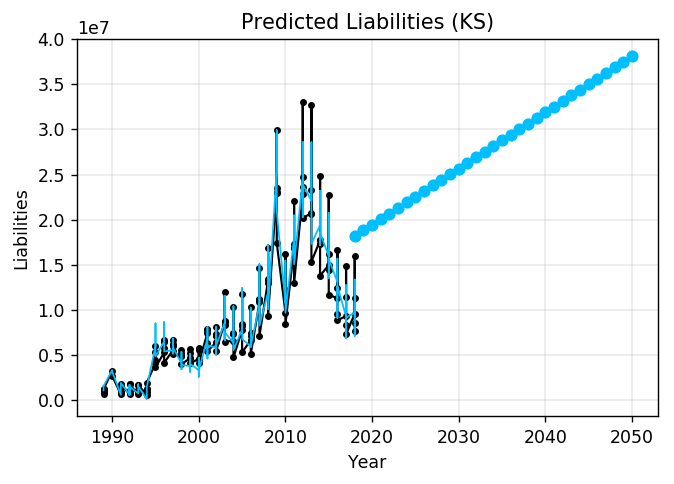

In [75]:
lin_model = get_lin_model_KS('Liabilities')
#plot_predicted_trend_KS('Liabilities', lin_model)
plot_predicted_trend_KS('Liabilities', lin_model, projected_features_targets_KS)

#### Washington

In [52]:
print('Subsidy:', get_lin_mod_feat_WA('Subsidy'))
print('Average Temperature:', get_lin_mod_feat_WA('Average Temperature'))
print('Precipitation:', get_lin_mod_feat_WA('Precipitation'))
print('Units Earning Premium:', get_lin_mod_feat_WA('Units Earning Premium'))
print('Indemnified:', get_lin_mod_feat_WA('Units Indemnified'))

Subsidy: {'R2': 0.20944283974614775, 'm': 94335.6079976378, 'b': -188114639.3347275}
Average Temperature: {'R2': 0.0002287480698612843, 'm': -0.004435653710707654, 'b': 55.59974163348428}
Precipitation: {'R2': 0.005765207465470823, 'm': 0.23039678149140444, 'b': -432.92656621781816}
Units Earning Premium: {'R2': 0.03456418849422771, 'm': 30.7755832786928, 'b': -60361.59104532053}
Indemnified: {'R2': 0.08065343068023545, 'm': 19.854304733535105, 'b': -39515.012304325355}
